# Lab 2 - Statistikk

## CSV-filer
I denne oppgaven skal du gjøre statistikk på dataen fra andre labøvelse. Det er lagt ved eksempeldata i CSV-filen (CSV står for *comma seperated values*) og ser slik ut:
```
"m_Zn / g","V_gass / mL","P_0 / mmHg","t / degC","h_vann / mm"
0.090,34.4,1.013,23.2,135
0.092,35.1,0.9926,22,133
...
```
CSV-filer er veldig enkle å lese for programmer fordi de er så enkelt skrevet (sammenlignet med f.eks. xlsx-filer fra Microsoft Excel). 

## Dine data

<div class="alert alert-warning">
Det er anbefalt at du også lagrer filene dine i et CSV-format eller lignende. Hvis du har dataene allerede i et regneprogram som Excel eller LibreOffice Calc er det lett å eksportere dem til .csv med *Lagre som*-funksjonen.
</div>

## Lese CSV med NumPy
Under er det et eksempel på hvordan man kan lese en CSV-fil med NumPy. Funksjonen `np.genfromtxt` kan lett konvertere tekstfiler til NumPy-arrayer. Det første argumentet er filnavnet. For å lese filen slik på ønsket måte må man legge til noen instillinger:
- `delimiter`-variabelen sier hvilke(t) tegn som skiller verdiene. For CSV er dette gjerne *,* (det er jo tross alt *comma* serperated values), men kan også være andre ting som mellomrom.
- `skip_header`-variabelen er hvor mange linjer på starten av filen som ikke er selve verdiene. I eksempelfilen er det én linje med navn på hver kolonne med data.
- `unpack`-variablen er om vi vil ha arrays med kolonnene (`unpack=True`) eller radene (`unpack=False` *standard*).

<div class="alert alert-danger">
Pass godt på enhetene til verdiene du bruker. Python vet ikke hvilke enheter variabler er i så du må sørge for at alle beregninger skjer i kompatible enheter. I denne labben er det anbefalt å endre alle verdier for 
<ul>
  <li>masse til gram</li>
  <li>volum til liter</li>
  <li>trykk til atmosfærer</li>
  <li>temperatur til Kelvin</li>
</ul> 
</div>

In [12]:
# Extract variables from data source using NumPy
import numpy as np
m, V_gas, P_0, t, h_H2O = np.genfromtxt('example_data.csv', delimiter=',', skip_header=1, unpack=True)
# Convert degrees Celsius to Kelvin and mL to L
T = t + 273.15
V_gas = V_gas / 1000

# Print masses to check if values were extracted correcly
print m

[ 0.09   0.092  0.086  0.088  0.082]


## Beregn molar masse

<div class="alert alert-warning">
De neste delen tar for seg prelabben, men med programmering. Det kan være lurt å ha den fullførte prelabben forran seg når man gjør disse oppgavene. 
</div>

Du skal i slutten av denne oppgaven ha laget en funksjon som regner ut molarmassen til metallet. Men det er lurt å dele beregningene opp i flere mindre funksjoner — da blir det mye mer oversiktlig!

### Vannets damptrykk
I prelabben gir Tabell 2 vannets damptrykk ved forskjellige temperaturer og du må bruke formelen
$$P(t)=\frac{P_1-P_2}{t_1-t_2}\left(t-t_2\right)+P_2$$
til lineær interpolasjon.

NumPy har denne formelen innebygget. Den heter `interp(t, ti, Pi)` der `t` er temperaturen man vil interpolore for, `ti` og `Pi` er arrays med henholdsvis de kjente temperaturene og damptrykkene. (`interp` fungere så klart for andre ting en temperatur og trykk, men det er disse størrelse vi er interessert i.) Under er et eksempel på bruk av av funksjonen med visualisering.

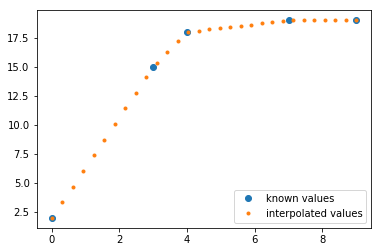

In [13]:
# Known values
x = [0, 3, 4, 7, 9]
y = [2, 15, 18, 19, 19]
# Interpolate
x_int = np.linspace(0, 9, 30)
y_int = np.interp(xvals, x, y)

# Visualise interpolation
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label='known values')
plt.plot(x_int, y_int, '.', label='interpolated values')
plt.legend()
plt.show()

Filen `vapour_pressure_water.csv` inneholder samme data som Tabell 2 i prelabben og ser slik ut:
```
"t / degC","P_vanndamp / atm"
16,0.01793
18,0.02036
...
```
Bruk funksjonen `np.genfromtxt` til å lese dataene fra CSV-filen (se [delen om å lese CSV-filer](#Lese-CSV-med-NumPy)) og bruk `np.interp` til å lage en funksjonen `P_vap_H2O(T)` som gir vannets damptrykk ved en (absolutt) temperatur `T`.

<div class="alert alert-danger">
Husk å sjekke enheter og konvertere der det er nødvendig. 
</div>

In [14]:
def P_vap_H2O(T):
    ### BEGIN SOLUTION ###
    t_data, P_data = np.genfromtxt('vapour_pressure_water.csv', delimiter=',', skip_header=1, unpack=True)
    T_data = t_data + 273.15
    return np.interp(T, T_data, P_data)
    ### END SOLUTION ###

### Vanntrykket
Lag en funksjon `P_H2O(h_H2O)` som regner ut vanntrykket i atmosfærer gitt vannhøyden `h_H2O` i millimeter. I koden er det allerede noen konstanter som kan være nyttige.

In [15]:
def P_H2O(h_H2O):
    d_H2O = 1.00
    d_Hg = 13.6
    mmHg_per_atm = 760. 
    ### BEGIN SOLUTION ###
    P_H2O_mmHg = d_H2O/d_Hg*h_H2O
    return P_H2O_mmHg / mmHg_per_atm
    ### END SOLUTION ###

### Hydrogentrykket
Lag en funksjon `P_H2(P_H2O, P_0, T)` som regner ut hydrogentrykket i atmosfærer gitt vanntrykket `P_H2O` i atmosfærer, barometertrykket `P_0` i atmosfærer og temperature `T` i Kelvin. 

In [24]:
def P_H2(P_H2O, P_0, T):
    ### BEGIN SOLUTION ###
    return P_0 - P_vap_H2O(T) - P_H2O
    ### END SOLUTION ###

### Sett funksjonene sammen for å beregne molarmasse
Funksjonen `molar_mass(h, V, T, m)` kan lages nå. `h` er vannhøyden i millimeter, `V` er det målte volumet i liter, `T` er den (absolutte) temperaturen og `m` er massen til metallet. Gasskonstanten `R` er allerede oppgitt i passende enheter.

In [22]:
def molar_mass(h, V, T, m):
    R = 8.2057338e-2 # L atm / K mol
    ### BEGIN SOLUTION ###
    return R*T*m/P_H2(P_H2O(h), P_0, T)/V
    ### END SOLUTION ###

Cellen under burde nå printe fornuftige verdier for molarmassen til metallet.

In [26]:
molar_mass(h_H2O, V_gas, T, m)

array([ 65.46585518,  66.56644928,  65.60199217,  65.13310982,  65.19108733])

## Konfidensintervall
Konfidensintervall er et intervall er et intervall som en gitt andel av gangene vil inneholde den sanne verdien av konstant. Antar man at målingene er normalfordelte, er det $p\%$-konfidensintervallet gitt ved
$$\left(\bar x-t_p\frac s{\sqrt{n}}, \bar x+t_p\frac s{\sqrt{n}}\right)$$
der $\bar x$ er gjennomsnittet, $s$ er standardavviket, $n$ er antall obserbasjoner og $t_p$ er en konstant bestemt av $p$.

Skriv en funksjon `conf_int` som returnerer de to grensene til intervallet.

In [28]:
def conf_int(data, p=.95):
    from scipy.stats import t
    n = np.size(data)
    tp = t.cdf(p, n-1)
    ### BEGIN SOLUTION ###
    from math import sqrt
    x_bar = np.mean(data)
    s = np.std(data)
    h = tp*s/sqrt(n)
    return x_bar - h, x_bar + h
    ### END SOLUTION ###

Bruk `conf_int` på verdiene du fikk for molarmassen. Er litteraturverdien for molarmassen i intervallet? Hva forteller svaret deg?

Hvis litteraturverdien ikke er innenfor, er det okay? Kan du evt. forklare hvorfor den ikke er innenfor?

In [29]:
### BEGIN SOLUTION
conf_int(molar_mass(h_H2O, V_gas, T, m))
### END SOLUTION

(65.406228279901413, 65.777169232232794)

## Students $t$-test

### Hypotesene
Hvis måledataene våre er normalfordelte (ofte er de tilnærmet det), kan Students $t$-test brukes for å undersøke om en hypotese er statistisk signifikant. Her skal hypotsen
$$H_0: \text{Molarmassen til metallet er lik litteraturverdien ($\bar x = \mu_0$)}$$
testes mot den alternative hypotesen
$$H_\mathrm{a}: \text{Molarmassen til metallet er $ikke$ lik litteraturverdien ($\bar x \neq \mu_0$)}.$$

### $t$-observabelen
Først må $t^*$-observabelen beregnes som er gitt ved
$$t^*=\frac{\bar x-\mu_0}{s/\sqrt n}$$
    der $\bar x$ er gjennomsnittet til måledataene (i dette tilfellet molarmassene), $\mu_0$ er verdien i nullhypotesen vi skal teste for (i dette tilfellet litteraturverdien), $s$ er standardavviket og $n$ er antallet observasjoner.

Lag en funksjon `t_stat(data, mu_0)` som beregner $t^*$-observabelen.

In [42]:
def t_stat(data, mu_0):
    ### BEGIN SOLUTION ###
    from math import sqrt
    return (np.mean(data)-mu_0)*sqrt(np.size(data))/np.std(data)
    ### END SOLUTION ###

### $P$-verdi
$P$-verdien er sannsynligheten for å observere en mer ekstrem verdi (i dette tilfellet større eller mindre) for $t^*$ gitt at nullhypotesen er sann.

Dersom $P$-verdien er liten, altså at vi vil sjeldent se mer ekstreme verdier enn den observerte, må nullhypotensen forkastes. Man må på forhånd bestemme liten $P$-verdien skal være og kaller denne verdien signifikansnivået $\alpha$ og settes ofte til $5 \%$ eller lavere. Dersom $P\leq\alpha$ sier man at $H_0$ forkastes med signifikans $\alpha$.  

$P$-verdien er det ikke noen enkel formel å regne ut, men SciPy har heldigvis noen innebyggede funksjoner til hjelp. Under er det gitt en funksjon for å regne ut $P$-verdien.

In [56]:
def P_value(data, mu_0):
    from scipy.stats import t
    return t.sf(np.abs(t_stat(data, mu_0)), np.size(data)-1)*2

Undersøk om molarmassen du beregnet til signifikant lik litteraturverdien, bruk $\alpha=5\%$.

1.2236826381130581e-08

### Fun fact
*Student* i "Students $t$-test" har ikke direkte noe med studenter å gjøre. Det var pseudonymet til kjemikeren W. S. Gosset som jobbet ved Guinness' bryggeri i Dublin. Det sies at enten så foretrakk arbeidsgiveren hans at de ansatte publiserte under pseudonymer eller at de ikke fikk lov til å publisere. Uansett bruke han pseudonymet *Student* når han publiserte artiklene sin om $t$-testen, og den ble derfor gjent som Students $t$-test. Ved Guinness brukte Gosset $t$-testen til å undersøke kvaliteten til bygg og stout